In [476]:
from nltk.tokenize import sent_tokenize, word_tokenize, WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
from nltk.corpus import stopwords
import gensim.corpora as corpora
import gensim
from pprint import pprint
from tkinter import *
from googlesearch import search
import wikipediaapi

In [477]:
stop_words = stopwords.words('english')
stop_words.append('.')
stop_words.append(',')
stop_words.append('\'s')
stop_words.append('\'\'')
stop_words.append('``')
stop_words.append('(')
stop_words.append(')')
stop_words.append('us')
stop_words.append('The')
stop_words.append('$')

I use nltk.corpus.stopwords to generate stop words. I also decided to add more special character that I found after fitting it into LDA model becuase the stop word does not have it. 

In [478]:
dataTXT = []
count = 0
for line in open('AI_info.txt', 'r').read().split('\n'):
        count += 1
        if line != '':
            dataTXT.append(line)

Read AI_Info.txt and store them in dataTXT list.

In [479]:
num_topics = 4
ai_topic_word = []
data_words = []

In [480]:
def getTextData(text):
    input_text = []
    count = 0
    for line in text.split('\n'):
        count += 1
        if line != '':
            input_text.append(line)

    word_dict_ = {}
    for index, line in enumerate(input_text):
        word_dict_[index] = word_tokenize(line)

    word_dict = {}
    for w in word_dict_:
        temp = []
        for ww in word_dict_[w]:
            if ww not in temp and ww not in stop_words:
                temp.append(ww)
        word_dict[w] = temp

    lemma_word_dict = {}
    for line in word_dict:
        lemma_word_dict[line] = []
        lemmatizer = WordNetLemmatizer()
        for i in word_dict[line]:
            lemma_word_dict[line].append(lemmatizer.lemmatize(i, pos='n'))
    return lemma_word_dict

This method takes parameter split it line by lines. For each line it split it tokenized those lines. Then remove stop words. After it use WordNetLemmatizer to reverte words back to it's root word so that we don't have words with the same meaning but are different like, eat, eaten, ate. 
Finally return a dictionary of each lines of lists that has been tokenized, removed stop words, and lammatized.

In [481]:
def getLdaData(word_dict):
    data_words = []
    for w in word_dict:
        data_words.append(list(word_dict[w]))
    dict_tokens = corpora.Dictionary(data_words)
    doc_term_mat = [dict_tokens.doc2bow(token) for token in data_words]
    texts = data_words
    corpus = [dict_tokens.doc2bow(text) for text in texts]
    return dict_tokens, doc_term_mat, texts, corpus

return data for LDA model that is converted from word_dict that can get from getTextData(text)

In [482]:
def isAIRelated(query):
    global data_words
    lemma_word_dict = getTextData(query)
    dict_tokens, doc_term_mat, texts, corpus = getLdaData(lemma_word_dict)
    count_topic = [0] * len(ai_topic_word)
    isAI = False
    for text in texts:
        for t in text:
            c = 0
            for ai_text in ai_topic_word:
                if t in ai_text:
                    isAI = True
                    count_topic[c] += 1
                c += 1
    index = 0
    for i in range(len(ai_topic_word)):
        if index != i and count_topic[i] > count_topic[index]:
            index = i
    return isAI, dataTXT[index]

With the parameter I called the method getTextData(query) and store it as lemma_word_dict, and finally getLdaData(lemma_word_dict). <br/>
texts is a return value from getLdaData(lemma_word_dict) that contain all tokenized words and stored into a list. For each word in that I list I count the occurrence from ai_topic_word (a list of top words of each topic). <br/>
- Example if ai_topic_word is [['system', 'intelligent', 'ai', 'pattern', 'artificial'], ['ai', 'nearly', 'potential', 'artificial', 'predicts'], ['system', 'work', 'ai', 'additional', 'data'], ['ai', 'artificial', 'intelligence', 'good', 'reason']]
- Then chatbot input is system work ai data, this will be the result count_topic [2, 1, 4, 1].
- In count_topic [2, 1, 4, 1] the index of highest value is 3, so it will return isAI = true and the text in AI_Info.txt line 3

In [483]:
lemma_word_dict = getTextData(open('AI_info.txt', 'r').read())
dict_tokens, doc_term_mat, texts, corpus = getLdaData(lemma_word_dict)

In [484]:
data_words = []
for w in lemma_word_dict:
    data_words.append(list(lemma_word_dict[w]))
dict_tokens = corpora.Dictionary(data_words)
doc_term_mat = [dict_tokens.doc2bow(token) for token in data_words]
texts = data_words
corpus = [dict_tokens.doc2bow(text) for text in texts]

In [485]:
lda = gensim.models.LdaModel(corpus=corpus, id2word=dict_tokens, num_topics=num_topics)
ai_topic_word = []
for i in range(num_topics):
    temp = []
    for l in lda.show_topic(topicid=i, topn=5):
        if l[0].lower() not in ai_topic_word:
            temp.append(l[0].lower())
    ai_topic_word.append(temp)

I use LdaModel to get the top 5 topics out of 4 topics. I added those words into a list named ai_topic_word.


In [486]:
print(ai_topic_word)

[['system', 'ai', 'intelligent', 'intelligence', 'pattern'], ['work', 'system', 'ai', 'industry', 'change'], ['intelligence', 'ai', 'artificial', 'solely', 'science'], ['ai', 'intelligence', 'one', 'reality', 'transform']]


In [487]:
def wikipediaSummary(query):
    wiki_wiki = wikipediaapi.Wikipedia('en')
    page_py = wiki_wiki.page(query)
    return page_py.summary

I tried to use google to generate response then but it is way too complicated. So I use wikipediaapi and return a string of summary from this library.

In [488]:
root = Tk()
root.title("Chatbot")
def send():
    send = "You -> "+e.get()
    txt.insert(END, "\n"+send)
    user = e.get().lower()
    if(user == "hello"):
        txt.insert(END, "\n" + "Bot -> Hi")
    elif(user == "hi" or user == "hii" or user == "hiiii"):
        txt.insert(END, "\n" + "Bot -> Hello")
    elif(e.get() == "how are you"):
        txt.insert(END, "\n" + "Bot -> fine! and you")
    elif(user == "fine" or user == "i am good" or user == "i am doing good"):
        txt.insert(END, "\n" + "Bot -> Great! how can I help you.")
    else:
        isAI, msg = isAIRelated(user)
        if isAI:
            txt.insert(END, "n" + msg)
        else:
            txt.insert(END, "n" + wikipediaSummary(user))
    e.delete(0, END)
txt = Text(root)
txt.grid(row=0, column=0, columnspan=2)
e = Entry(root, width=100)
e.grid(row=1, column=0)
send = Button(root, text="Send", command=send).grid(row=1, column=1)
root.mainloop()

I added a few default response to this chatbot. At the else statement I called isAIRelated(user) if isAI return true then response with one of the string from AI_Info.txt. Otherwise it will return a string of summary from wikipedia.

Example out that I entered:<br/>
my inputs are <br/>
- Hello (Some default response)
- Joe Biden (Not in ai_topic_word so it will get a wikipedia summary)
- intelligence artificial solely (These words are in ai_topic_word, they occured within index 3 of ai_topic_word the most so it return text from line 3 in AI_info.txt)
<br/>
In this example ai_topic_word is [['system', 'ai', 'intelligent', 'intelligence', 'pattern'], ['work', 'system', 'ai', 'industry', 'change'], ['intelligence', 'ai', 'artificial', 'solely', 'science'], ['ai', 'intelligence', 'one', 'reality', 'transform']]
<br/>
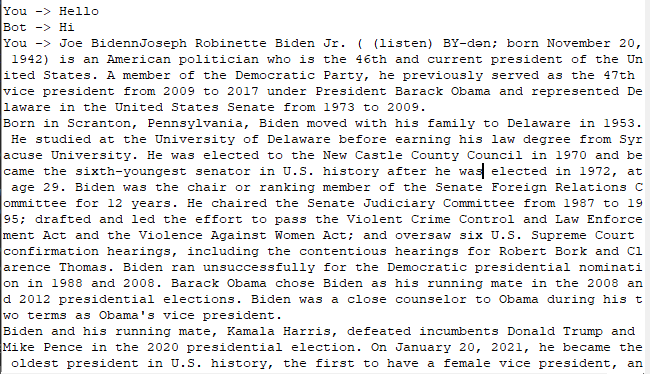
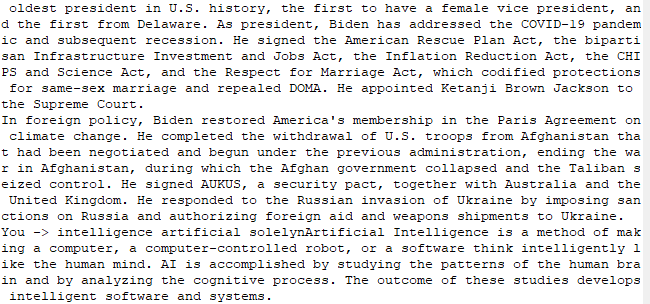